In [1]:
import pandas as pd
import numpy as np

In [4]:
url2  = "https://raw.githubusercontent.com/adashofdata/muffin-cupcake/master/recipes_muffins_cupcakes_scones.csv"
url1 = "https://raw.githubusercontent.com/adashofdata/muffin-cupcake/master/recipes_muffins_cupcakes.csv"

In [5]:
cupcake = pd.read_csv(url1)
scone = pd.read_csv(url2)

In [6]:
#packages for analysis
from sklearn import svm
#packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

# pickle package
import pickle

In [8]:
cupcake.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


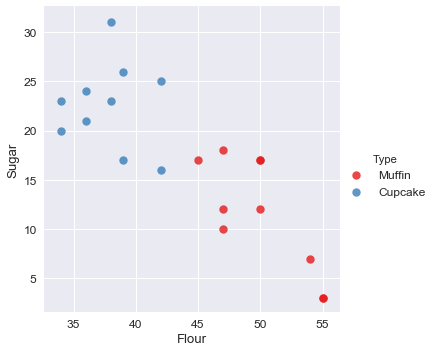

In [18]:
# plot 2 ingredients
sns.lmplot('Flour', 'Sugar', data=cupcake, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [19]:
#specify inputs for the model
ingredients = cupcake[['Flour','Sugar']]
type_label = np.where(cupcake['Type']== 'Muffin', 0, 1)

# Feature names
recipe_features = cupcake.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [41]:
type_label


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
# fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
model.support_vectors_

array([[45., 17.],
       [42., 16.],
       [42., 25.]])

In [36]:
np.linspace(30,60)

array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
       33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
       36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
       39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
       42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
       45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
       48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
       51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
       54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       57.55102041, 58.16326531, 58.7755102 , 59.3877551 , 60.        ])

In [37]:
# visualize the results
# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

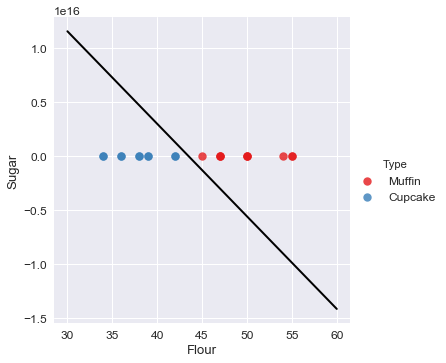

In [38]:
# plot 2 ingredients
sns.lmplot('Flour', 'Sugar', data=cupcake, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')

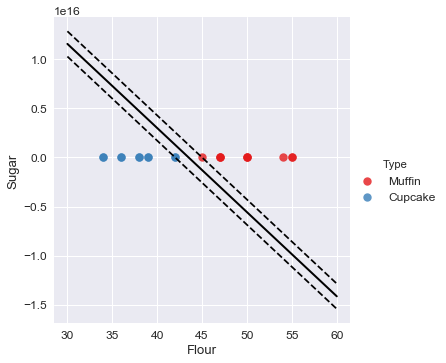

In [43]:
# look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=cupcake, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
# lower bound of svm
plt.plot(xx,yy_down,'k--')
# upper bound of svm
plt.plot(xx,yy_up,'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');